In [1]:
import numpy as np
import pandas as pd
import os
import itertools
import os, stat, time
from os.path import dirname as up
import shutil
from PIL import Image
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os 

os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

base = './kaggle/input/breast-histopathology-images/'

ids = os.listdir(base)
data = []
for id in tqdm(ids):
  try:
    files1 = os.listdir(base + id + '/1/')
    files0 = os.listdir(base + id + '/0/')
    for x in files1:
      data.append(base + id + '/1/' + x)
    for x in files0:
      data.append(base + id + '/0/' + x)
  except:
    FileNotFoundError
len(data)

  0%|          | 0/279 [00:00<?, ?it/s]

277524

In [3]:
import random

random.shuffle(data)
data = data[:20000]
len(data)

20000

In [4]:
import cv2
from tqdm.notebook import tqdm
import keras_preprocessing.image as IMAGE
from PIL import Image

images=[]
labels=[]

for i in tqdm(data):
  label = int(i[-5])
  img = IMAGE.img_to_array(IMAGE.load_img(i, target_size=(50, 50)))
  images.append(img)
  labels.append(label)

  0%|          | 0/20000 [00:00<?, ?it/s]

In [5]:
from sklearn.model_selection import train_test_split

y = np.array(labels)
x = np.stack(images)/255

x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=0, test_size=0.3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(14000, 50, 50, 3) (6000, 50, 50, 3) (14000,) (6000,)


In [7]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(50,50,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer ='adam', metrics= ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 47, 47, 32)        1568      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          16416     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 32)         

In [8]:
import tensorflow as tf

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, verbose = 2, batch_size = 256)

2021-12-29 06:27:17.152074: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/100
55/55 - 12s - loss: 0.5814 - accuracy: 0.7060 - val_loss: 0.6097 - val_accuracy: 0.7095
Epoch 2/100
55/55 - 8s - loss: 0.4878 - accuracy: 0.7556 - val_loss: 0.5994 - val_accuracy: 0.6867
Epoch 3/100
55/55 - 8s - loss: 0.4345 - accuracy: 0.8091 - val_loss: 0.4267 - val_accuracy: 0.8257
Epoch 4/100
55/55 - 8s - loss: 0.4359 - accuracy: 0.8101 - val_loss: 0.4444 - val_accuracy: 0.8133
Epoch 5/100
55/55 - 9s - loss: 0.4248 - accuracy: 0.8169 - val_loss: 0.4484 - val_accuracy: 0.8110
Epoch 6/100
55/55 - 10s - loss: 0.4163 - accuracy: 0.8186 - val_loss: 0.5034 - val_accuracy: 0.7758
Epoch 7/100
55/55 - 9s - loss: 0.4144 - accuracy: 0.8204 - val_loss: 0.4721 - val_accuracy: 0.7957
Epoch 8/100
55/55 - 10s - loss: 0.4099 - accuracy: 0.8231 - val_loss: 0.4107 - val_accuracy: 0.8257
Epoch 9/100
55/55 - 12s - loss: 0.4094 - accuracy: 0.8236 - val_loss: 0.4154 - val_accuracy: 0.8205
Epoch 10/100
55/55 - 10s - loss: 0.4058 - accuracy: 0.8232 - val_loss: 0.4040 - val_accuracy: 0.8322
Epoc

Epoch 83/100
55/55 - 8s - loss: 0.3436 - accuracy: 0.8539 - val_loss: 0.4008 - val_accuracy: 0.8430
Epoch 84/100
55/55 - 8s - loss: 0.3419 - accuracy: 0.8553 - val_loss: 0.4318 - val_accuracy: 0.8193
Epoch 85/100
55/55 - 9s - loss: 0.3453 - accuracy: 0.8533 - val_loss: 0.4097 - val_accuracy: 0.8353
Epoch 86/100
55/55 - 8s - loss: 0.3465 - accuracy: 0.8552 - val_loss: 0.3953 - val_accuracy: 0.8388
Epoch 87/100
55/55 - 9s - loss: 0.3447 - accuracy: 0.8526 - val_loss: 0.4001 - val_accuracy: 0.8400
Epoch 88/100
55/55 - 9s - loss: 0.3393 - accuracy: 0.8565 - val_loss: 0.3799 - val_accuracy: 0.8422
Epoch 89/100
55/55 - 10s - loss: 0.3405 - accuracy: 0.8558 - val_loss: 0.3979 - val_accuracy: 0.8353
Epoch 90/100
55/55 - 9s - loss: 0.3433 - accuracy: 0.8541 - val_loss: 0.4205 - val_accuracy: 0.8273
Epoch 91/100
55/55 - 9s - loss: 0.3402 - accuracy: 0.8559 - val_loss: 0.4697 - val_accuracy: 0.7960
Epoch 92/100
55/55 - 9s - loss: 0.3405 - accuracy: 0.8555 - val_loss: 0.3915 - val_accuracy: 0.8383

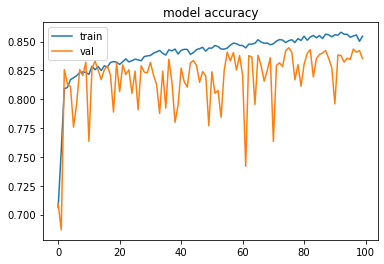

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

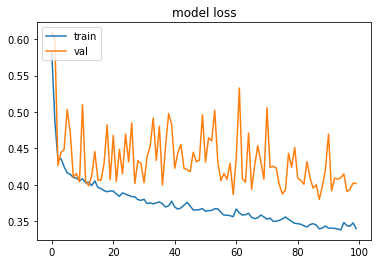

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()